# Regression Tree

It's time to design our generic model that can be applied to any player. It will be based on the regression tree we designed using Federer as an exemple.

In [54]:
### IMPORTS ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
### CLEAN PLAYER MATCHES TABLES ###

player = "Novak Djokovic"
setup = False

if (setup) :    # Creating the table (if the player.csv table currently contains information for another player)

    atp = pd.read_csv("atp_cat.csv")

    player_won = atp[atp["winner_name"] == player]
    player_lost = atp[atp["loser_name"] == player]

    # We'll drop all of the player's information except his age and rank
    player_won = player_won.drop(labels=["winner_name", "winner_hand", "winner_ht", "winner_ioc"], axis=1)
    player_won = player_won.rename(columns={"winner_age": "player_age", "winner_rank": "player_rank", "winner_rank_points": "player_rank_points",
                                    "loser_name":"opp_name", "loser_hand":"opp_hand", "loser_ht":"opp_ht", "loser_ioc":"opp_ioc", "loser_age":"opp_age",
                                    "loser_rank": "opp_rank", "loser_rank_points": "opp_rank_points"})
    player_won["index2"] = player_won.index
    player_won["player_won"] = "1"

    player_lost = player_lost.drop(labels=["loser_name", "loser_hand", "loser_ht", "loser_ioc"], axis=1)
    player_lost = player_lost.rename(columns={"loser_age": "player_age", "loser_rank": "player_rank", "loser_rank_points": "player_rank_points",
                                        "winner_name":"opp_name", "winner_hand":"opp_hand", "winner_ht":"opp_ht", "winner_ioc":"opp_ioc", "winner_age":"opp_age",
                                        "winner_rank": "opp_rank", "winner_rank_points": "opp_rank_points"})
    player_lost["index2"] = player_lost.index
    player_lost["player_won"] = "0"

    player = pd.concat([player_won, player_lost])
    player = player.drop(["Unnamed: 0", "index2"] , axis=1)
    player.sort_index(inplace=True)

    player.to_csv("player.csv")     # Saving the table for ease of use

else :  # player.csv already contains this player's information

    player = pd.read_csv("player.csv")

player    # Clean Table of all Roger Federer ATP matches

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,tourney_name,...,score,best_of,round,minutes,player_rank,player_rank_points,opp_rank,opp_rank_points,player_won,consecutive
0,0,0,0,0,0,0,0,0,39968,Bangkok,...,4-6 7-5 6-4,3,R32,112.0,248.0,148.0,81.0,496.0,0,0
1,1,1,1,1,1,1,1,1,41582,Umag,...,7-6(5) 6-1,3,R32,90.0,368.0,83.0,65.0,630.0,0,0
2,2,2,2,2,2,2,2,2,42684,Bucharest,...,2-6 6-4 6-4,3,R32,146.0,272.0,128.0,67.0,623.0,1,0
3,3,3,3,3,3,3,3,3,42693,Bucharest,...,4-6 6-4 6-4,3,R16,155.0,272.0,128.0,54.0,714.0,0,0
4,4,4,4,4,4,4,4,4,43520,Paris Masters,...,4-1 RET,3,R64,19.0,85.0,488.0,37.0,853.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1088,1088,1088,1088,1088,1088,1088,1088,86190,Us Open,...,6-7(4) 6-3 6-3 6-2,5,R32,212.0,1.0,11113.0,56.0,1208.0,1,24
1089,1089,1089,1089,1089,1089,1089,1089,1089,86206,Us Open,...,1-6 6-3 6-2 6-2,5,R16,179.0,1.0,11113.0,99.0,812.0,1,25
1090,1090,1090,1090,1090,1090,1090,1090,1090,86214,Us Open,...,5-7 6-2 6-2 6-3,5,QF,207.0,1.0,11113.0,8.0,5533.0,1,26
1091,1091,1091,1091,1091,1091,1091,1091,1091,86218,Us Open,...,4-6 6-2 6-4 4-6 6-2,5,SF,214.0,1.0,11113.0,4.0,8240.0,1,27


In [56]:
# WIN STREAKS

result = player.player_won.astype(int)

consecutive = result.groupby((result != result.shift()).cumsum()).cumcount()    # identifying the streaks by comparing to a shifted column

wins = pd.DataFrame({"win" : result, "consecutive" : consecutive})

m = wins.win == 1   # masking out lose streaks
wins.consecutive = wins.consecutive.where(m, 0)

player["consecutive"] = wins.consecutive

player.to_csv("player.csv")

player.tail(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,tourney_name,...,score,best_of,round,minutes,player_rank,player_rank_points,opp_rank,opp_rank_points,player_won,consecutive
1083,1083,1083,1083,1083,1083,1083,1083,1083,85678,Wimbledon,...,6-3 6-4 6-4,5,QF,137.0,1.0,12113.0,48.0,1344.0,1,19
1084,1084,1084,1084,1084,1084,1084,1084,1084,85682,Wimbledon,...,7-6(3) 7-5 7-5,5,SF,164.0,1.0,12113.0,12.0,2915.0,1,20
1085,1085,1085,1085,1085,1085,1085,1085,1085,85684,Wimbledon,...,6-7(4) 6-4 6-4 6-3,5,F,204.0,1.0,12113.0,9.0,4468.0,1,21
1086,1086,1086,1086,1086,1086,1086,1086,1086,86094,Us Open,...,6-1 6-7(5) 6-2 6-1,5,R128,135.0,1.0,11113.0,145.0,541.0,1,22
1087,1087,1087,1087,1087,1087,1087,1087,1087,86158,Us Open,...,6-2 6-3 6-2,5,R64,99.0,1.0,11113.0,121.0,675.0,1,23
1088,1088,1088,1088,1088,1088,1088,1088,1088,86190,Us Open,...,6-7(4) 6-3 6-3 6-2,5,R32,212.0,1.0,11113.0,56.0,1208.0,1,24
1089,1089,1089,1089,1089,1089,1089,1089,1089,86206,Us Open,...,1-6 6-3 6-2 6-2,5,R16,179.0,1.0,11113.0,99.0,812.0,1,25
1090,1090,1090,1090,1090,1090,1090,1090,1090,86214,Us Open,...,5-7 6-2 6-2 6-3,5,QF,207.0,1.0,11113.0,8.0,5533.0,1,26
1091,1091,1091,1091,1091,1091,1091,1091,1091,86218,Us Open,...,4-6 6-2 6-4 4-6 6-2,5,SF,214.0,1.0,11113.0,4.0,8240.0,1,27
1092,1092,1092,1092,1092,1092,1092,1092,1092,86220,Us Open,...,6-4 6-4 6-4,5,F,136.0,1.0,11113.0,2.0,9980.0,0,0


## Regression Decision Tree

We will create a decision tree using these features :
- Surface  
- Best of  
- Opponent hand  
- Opponent height  
- Opponent country  
- Ranking difference  
- Tournament level  
- Match round (QF, SF, F, etc...)
- Player form  

Some of these features seem irrelevant, and they probably are. However, since we will use GridSearchCV to perform feature selection, we will feed the model all the information we have and let it select what is important.

### Formatting

In [57]:
player1 = player[["minutes", "surface", "best_of", "opp_hand", "opp_ht", "opp_age", "tourney_level", "round"]]
player1["rank_diff"] = player["player_rank"] - player["opp_rank"]
player1["consecutive"] = player["consecutive"]

# One-Hot Encoding
player1 = pd.get_dummies(data=player1, columns=["surface", "best_of", "opp_hand", "tourney_level", "round"])

player1 = player1.dropna(axis=0, how='any')

player1.head(5)

C:\Users\uporito\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\uporito\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,minutes,opp_ht,opp_age,rank_diff,consecutive,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,best_of_3,...,tourney_level_G,tourney_level_M,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,112.0,185.0,29.232033,167.0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,90.0,183.0,22.869268,303.0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,146.0,173.0,26.740589,205.0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,155.0,175.0,22.450376,218.0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,19.0,198.0,24.279261,48.0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


### Regression Decision Tree



#### Pre-processing

For pre-processing we have three options :
- not scaling x or y
- scaling both x and y
- scaling x but not y   
  
I feel like scaling gives us better results but adds a hurdle in interpreting the tree's visualization since it displays scaled values. We can scale both input and output values back, just not display them with sklearns's plot_tree (or any tree visualization that I've found so far). For now, the roundabout solution is just to print out the scaled input and output.

In [80]:
### PRE-PROCESSING ###

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target='minutes'

scale_x = False
scale_y = False

def preprocessing(scale_x=False, scale_y=False) :

    # 1. X, y unscaled
    X = player1.drop([target], axis=1)
    y = np.asarray(player1[target])
    y = y.reshape(-1,1)

    xscaler = StandardScaler()
    yscaler = StandardScaler()

    if (scale_x) :
        print("Scaling X...")
        xscaler.fit(X[['opp_ht', 'opp_age', 'rank_diff']])
        X[['opp_ht', 'opp_age', 'rank_diff']] = xscaler.transform(X[['opp_ht', 'opp_age', 'rank_diff']])

    if (scale_y) :
        print("Scaling y...")
        yscaler.fit(y)
        y = yscaler.transform(y)

    display(pd.DataFrame(X).head())
    display(pd.DataFrame(y).head())

    return X, y, xscaler, yscaler

X, y, xscaler, yscaler = preprocessing(scale_x, scale_y)
X.columns

,opp_ht,opp_age,rank_diff,consecutive,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,best_of_3,best_of_5,...,tourney_level_G,tourney_level_M,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,185.0,29.232033,167.0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,183.0,22.869268,303.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,173.0,26.740589,205.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,175.0,22.450376,218.0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,198.0,24.279261,48.0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


,0
0,112.0
1,90.0
2,146.0
3,155.0
4,19.0


Index(['opp_ht', 'opp_age', 'rank_diff', 'consecutive', 'surface_Carpet',
       'surface_Clay', 'surface_Grass', 'surface_Hard', 'best_of_3',
       'best_of_5', 'opp_hand_L', 'opp_hand_R', 'tourney_level_A',
       'tourney_level_D', 'tourney_level_F', 'tourney_level_G',
       'tourney_level_M', 'round_F', 'round_QF', 'round_R128', 'round_R16',
       'round_R32', 'round_R64', 'round_RR', 'round_SF'],
      dtype='object')

#### Building the tree

To build a good tree, we need to select values for the tree's parameters (e.g. max depth, minimum samples per leaf). We'll perform this "Hyperparameter Tuning" using GridSearchCV, a library which selects the best tree by trying every combination of parameters we give it and performing a cross validation. The trees are commpared based on the R² criteria.  
  
![score formula](res/score.png "sklearn score")  
  
After building this somewhat optimal tree, we test it on a train-test-split sample and visualize the results.

In [59]:
# Parameter Selection :

from sklearn.model_selection import GridSearchCV

params = {
    # "criterion":("squared_error", "friedman_mse", "absolute_error", "poisson"), 
    "max_depth":np.arange(3, 10), 
    "min_samples_leaf":np.arange(1, 80), 
    # "min_weight_fraction_leaf":[0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.075, 0.001], 
    # "max_features":np.arange(1, 25)
}

dtr = DecisionTreeRegressor(random_state=42)
dtr_cv = GridSearchCV(dtr, params, scoring="r2", n_jobs=-1, verbose=1, cv=10)

In [81]:
### CUSTOM PREDICTION ###

def custom_predict(scale_x, scale_y, height, age, rank_diff, consecutive, surface, best_of, hand, level, round) :
    # surface : carpet(1), clay(2), grass(3), hard(4)
    # best of : 3(1), 5(2)
    # hand : left(1), right(2)
    # level : A(1), D(2), F(3), G(4), M(5)
    # round : F(1), QF(2), R128(3), R16(4), R32(5), R64(6), R(7), SF(8)

    surface_input = [0, 0, 0, 0]
    surface_input[surface - 1] = 1

    bo_input = [0, 0]
    bo_input[best_of - 1] = 1

    hand_input = [0, 0]
    hand_input[hand - 1] = 1

    level_input = [0, 0, 0, 0, 0]
    level_input[level - 1] = 1

    round_input = [0, 0, 0, 0, 0, 0, 0, 0]
    round_input[round - 1] = 1

    if (not scale_x and not scale_y) :  # 1. X, y unscaled
        input = [height, age, rank_diff] + [consecutive] + surface_input + bo_input + hand_input + level_input + round_input
        print("Input : ", input)

        input = [input]

        print("Prediction : ", dtr.predict(input), " minutes")

    # input = [180, 0, 0, 0, 1, 0, 0, 0, 1]

    elif (scale_x and scale_y) :    # 2. X, y scaled
        input = xscaler.transform([[height, age, rank_diff]])
        input = np.append(input[0], consecutive, surface_input + bo_input + hand_input + level_input + round_input)
        print("Scaled input : ", input)

        input = [input]

        print("Scaled Prediction : ", dtr.predict(input), " minutes")
        print("Prediction : ", yscaler.inverse_transform(dtr.predict(input)), " minutes")

    elif (scale_x and not scale_y) :    # 3. X scaled, y unscaled
        input = xscaler.transform([[height, age, rank_diff]]).tolist()
        input = np.append(input[0], [consecutive] + surface_input + bo_input + hand_input + level_input + round_input)
        print("Scaled input : ", input)
        
        input = [input]

        print("Prediction : ", dtr.predict(input)[0], " minutes")

    return(dtr.predict(input)[0])

# prediction = predict(scale_x, scale_y, 180, 22, 0, 0, 4, 1, 2, 4, 5)

In [87]:
# Fit-Train-Test Loop :

test_scores = []
predictions = []

for i in range(30) :

    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.3)
    dtr_cv.fit(Xtrain, ytrain)

    best_params = dtr_cv.best_params_
    print(f"Best parameters: {best_params})")

    dtr = DecisionTreeRegressor(**best_params)
    dtr.fit(Xtrain, ytrain)

    # Testing :

    ypred = dtr.predict(Xtest)

    print(f"Training score {i+1} : ", dtr.score(Xtrain, ytrain))
    print(f"Testing score {i+1} : ", dtr.score(Xtest, ytest))
    test_scores.append(dtr.score(Xtest, ytest))

    predictions.append(custom_predict(scale_x, scale_y, 180, 22, 10, 0, 4, 1, 2, 4, 5))

print("Test scores : ", test_scores)
print("Test scores average : ", sum(test_scores)/len(test_scores))

print(predictions)

Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 3, 'min_samples_leaf': 14})
Training score 1 :  0.36444347154110357
Testing score 1 :  0.24569231939053082
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [114.43125]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 3, 'min_samples_leaf': 32})
Training score 2 :  0.35444104436096935
Testing score 2 :  0.2697989468478986
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [110.35416667]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 5, 'min_samples_leaf': 51})
Training score 3 :  0.3576268836629585
Testing score 3 :  0.24982441390451338
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [162.37254902]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 3, 'min_samples_leaf': 23})
Training score 4 :  0.36133270823884234
Testing score 4 :  0.28620013009251566
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [111.28057554]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 4, 'min_samples_leaf': 32})
Training score 5 :  0.3735295275722158
Testing score 5 :  0.18900233054758186
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [169.08823529]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 4, 'min_samples_leaf': 67})
Training score 6 :  0.3481171971342957
Testing score 6 :  0.2019668226191721
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [110.17829457]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 3, 'min_samples_leaf': 7})
Training score 7 :  0.37533289424560956
Testing score 7 :  0.2615829907147946
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [109.66242038]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 4, 'min_samples_leaf': 75})
Training score 8 :  0.3296838459734769
Testing score 8 :  0.2884413451526844
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [169.91818182]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 3, 'min_samples_leaf': 3})
Training score 9 :  0.3717787704685904
Testing score 9 :  0.26163779423457256
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [101.99590164]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 4, 'min_samples_leaf': 75})
Training score 10 :  0.3316631420293157
Testing score 10 :  0.27538226819563794
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [114.57657658]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 3, 'min_samples_leaf': 20})
Training score 11 :  0.35235952569432427
Testing score 11 :  0.2831491621318575
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [110.56756757]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 4, 'min_samples_leaf': 63})
Training score 12 :  0.3395475502356927
Testing score 12 :  0.27297074139693045
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [106.51724138]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 4, 'min_samples_leaf': 14})
Training score 13 :  0.38510867809885374
Testing score 13 :  0.3001946715459226
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [134.36842105]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:   10.5s finished


Best parameters: {'max_depth': 3, 'min_samples_leaf': 45})
Training score 14 :  0.3469700589000332
Testing score 14 :  0.2819885054052399
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [107.27333333]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 5, 'min_samples_leaf': 67})
Training score 15 :  0.3407463350426738
Testing score 15 :  0.2979891895540684
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [107.0617284]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 3, 'min_samples_leaf': 40})
Training score 16 :  0.3594080099310679
Testing score 16 :  0.2580449559727359
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [106.23684211]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 3, 'min_samples_leaf': 10})
Training score 17 :  0.38124999325139686
Testing score 17 :  0.20447821418575507
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [105.73972603]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 3, 'min_samples_leaf': 23})
Training score 18 :  0.36499040287538353
Testing score 18 :  0.27332349434181824
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [106.38064516]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 4, 'min_samples_leaf': 29})
Training score 19 :  0.35817718925374786
Testing score 19 :  0.333739543746974
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [111.12173913]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 3, 'min_samples_leaf': 23})
Training score 20 :  0.33224096702634986
Testing score 20 :  0.29582648949001
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [102.48638132]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 4, 'min_samples_leaf': 45})
Training score 21 :  0.37480337867547076
Testing score 21 :  0.17386158104062455
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [109.05063291]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 4, 'min_samples_leaf': 50})
Training score 22 :  0.34550485899157146
Testing score 22 :  0.2851225105369247
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [112.32857143]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 3, 'min_samples_leaf': 75})
Training score 23 :  0.3298303791086834
Testing score 23 :  0.2928324777328194
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [118.43478261]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 3, 'min_samples_leaf': 30})
Training score 24 :  0.3358688245698487
Testing score 24 :  0.35155924286170925
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [108.94771242]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 4, 'min_samples_leaf': 6})
Training score 25 :  0.41806751739588377
Testing score 25 :  0.25321942153087773
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [109.92]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 5, 'min_samples_leaf': 57})
Training score 26 :  0.33867657270266727
Testing score 26 :  0.31103608012516437
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [115.09836066]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 6, 'min_samples_leaf': 36})
Training score 27 :  0.3764805632693081
Testing score 27 :  0.22719605052737846
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [113.76666667]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 4, 'min_samples_leaf': 51})
Training score 28 :  0.36448526364224576
Testing score 28 :  0.22300944840345271
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [109.36144578]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 4, 'min_samples_leaf': 24})
Training score 29 :  0.39076276621563977
Testing score 29 :  0.22506333592659555
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [101.10416667]  minutes
Fitting 10 folds for each of 553 candidates, totalling 5530 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.4s


Best parameters: {'max_depth': 4, 'min_samples_leaf': 67})
Training score 30 :  0.3320822727049487
Testing score 30 :  0.29752534613200776
Input :  [180, 22, 10, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Prediction :  [119.89705882]  minutes
Test scores :  [0.24569231939053082, 0.2697989468478986, 0.24982441390451338, 0.28620013009251566, 0.18900233054758186, 0.2019668226191721, 0.2615829907147946, 0.2884413451526844, 0.26163779423457256, 0.27538226819563794, 0.2831491621318575, 0.27297074139693045, 0.3001946715459226, 0.2819885054052399, 0.2979891895540684, 0.2580449559727359, 0.20447821418575507, 0.27332349434181824, 0.333739543746974, 0.29582648949001, 0.17386158104062455, 0.2851225105369247, 0.2928324777328194, 0.35155924286170925, 0.25321942153087773, 0.31103608012516437, 0.22719605052737846, 0.22300944840345271, 0.22506333592659555, 0.29752534613200776]
Test scores average :  0.26572199414295894
[114.43125, 110.35416666666667, 162.37254901960785, 111.28057

[Parallel(n_jobs=-1)]: Done 5530 out of 5530 | elapsed:    8.6s finished


(array([ 3.,  6., 10.,  4.,  1.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  2.]),
 array([101.10416667, 104.54486742, 107.98556818, 111.42626894,
        114.8669697 , 118.30767045, 121.74837121, 125.18907197,
        128.62977273, 132.07047348, 135.51117424, 138.951875  ,
        142.39257576, 145.83327652, 149.27397727, 152.71467803,
        156.15537879, 159.59607955, 163.0367803 , 166.47748106,
        169.91818182]),
 <a list of 20 Patch objects>)

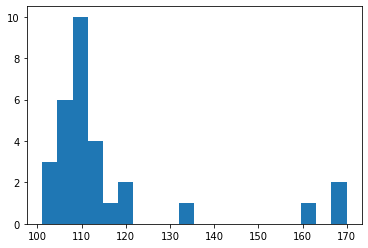

In [89]:
plt.hist(predictions, bins=20)

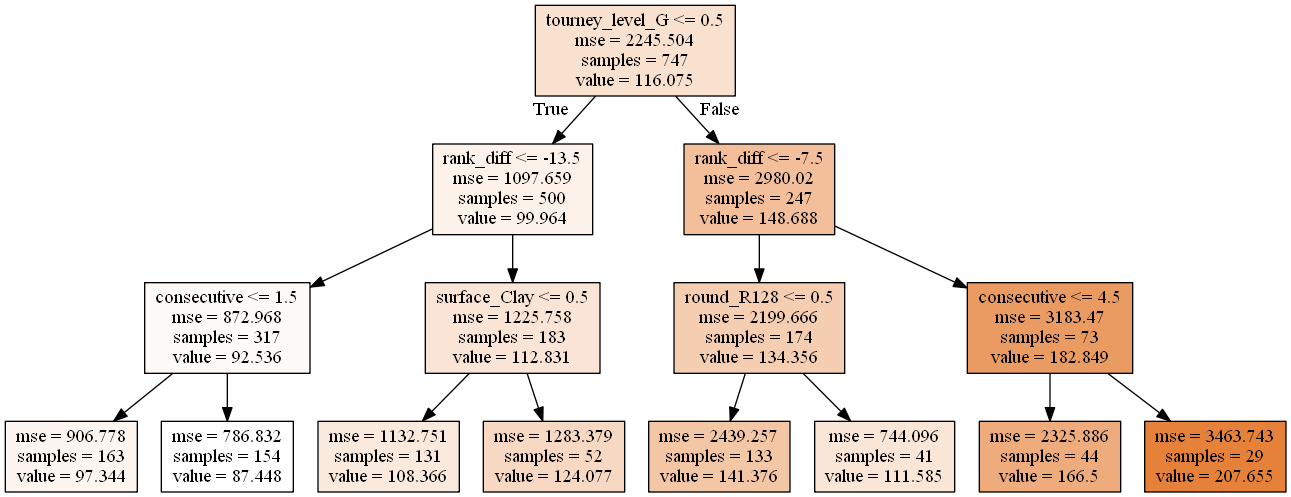

In [79]:
# VISUALIZATION

# Without True/False (sklearn)

# x_ax = range(len(ytest))
# plt.plot(x_ax, ytest, linewidth=1, label="original")
# plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
# plt.title("Y-test and y-predicted data")
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.legend(loc='best',fancybox=True, shadow=True)
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(30,15))
# tree.plot_tree(dtr,
#           filled=True,
#           rounded=True,
#           fontsize=10,
#           feature_names=["opp_ht", "opp_age", "rank_diff", "consecutive", "surface_Carpet", "surface_Clay", "surface_Grass", "surface_Hard", 
#                          "best_of_3", "best_of_5", "opp_hand_L", "opp_hand_R", 
#                          'tourney_level_A', 'tourney_level_D', 'tourney_level_F', 'tourney_level_G', 'tourney_level_M', 
#                          'round_F', 'round_QF', 'round_R128', 'round_R16', 'round_R32', 'round_R64', 'round_RR', 'round_SF'])

# # plt.savefig('tree_high_dpi', dpi=600)

# # With True/False label (pydot)

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

# def visualize_tree(dtr) :

features = list(player1.columns)
features.remove("minutes")

dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# visualize_tree(dtr)
